# Introduction

Dataset used for this project was retrieved from an open source https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?datasetId=216167&sortBy=voteCount. The data contains features relating to heart disease in patients. It takes into account the impact of several features to a binary target of 1 and 0, signifying presence of heart disease and no heart disease respectively. Below represents the list of features and descriptions:

- Age : age of the patient [years]
- Sex : sex of the patient [M: Male, F: Female]
- cp : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- trestbps : resting blood pressure [mm Hg]
- chol : serum cholesterol [mm/dl]
- fbs : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- restecg : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- thalach : maximum heart rate achieved [Numeric value between 60 and 202]
- exang : exercise-induced angina [Y: Yes, N: No]
- Oldpeak : oldpeak = ST [Numeric value measured in depression]
- slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- ca : number of major vessels (0-3) colored by flourosopy
- target : output class [1: heart disease, 0: Normal]

# Data Exploration

install and import necessary libraries

In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold 
from numpy import mean
from numpy import std

read csv file and assign to a variable 'df'

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Observation: data contains 1025 rows and 14 columns which is enough data for running predictions

Dropping the target feature and assigning to y variable and the other features assigning to X variable

In [4]:
X = df.drop('target', axis=1)
y = df['target']
print(X)
print(y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

Checking to see if any missing data or null values within the dataset by summing the total null values of each feature and printing the result

In [52]:
null_check = df.isnull().sum()
print(null_check)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
age_group    0
dtype: int64


Observation: No null values present

Checking the data types

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Observations: The data types are appropriate

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.shape

(1025, 14)

Using describe function generate a descriptive statistics of our dataset. These descriptive statistics involves the count, mean, standard deviation, minimum and maximum, and the interquartile ranges. This is helpful to get a quick overview of the dataset

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Splitting the dataset into categorical and numerical and checking the descriptive statistics of each category

In [10]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [11]:
df[categorical].describe()

,sex,cp,fbs,restecg,exang,slope,ca
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.695610,0.942439,0.149268,0.529756,0.336585,1.385366,0.754146
std,0.460373,1.029641,0.356527,0.527878,0.472772,0.617755,1.030798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000


In [12]:
df[numerical].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


Correlation check to know which features are highly correlated to the target feature.

In [13]:
correlation_check = df.corr()
correlation_check

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Making use of a heat map to better visualize the correlation, with darker shades signifying higher correlations

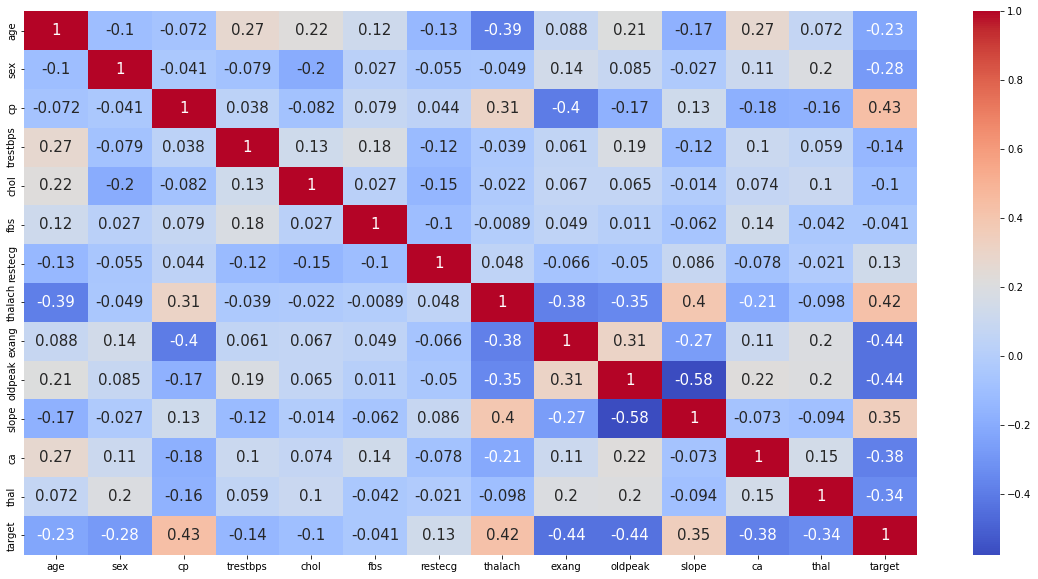

In [14]:
plt.figure(figsize=(20, 10))
heat_map_corr = sns.heatmap(correlation_check, annot = True, annot_kws={'size': 15}, cmap= 'coolwarm')

Observations: Chest pain, maximum heart rate achieved, exercise induced angina, and oldpeak all have the most significant impact on the target. While fasting blood sugar appears to have the least significant impact on the target.

Plotting a bar chart to visually display the distribution of the target variable.

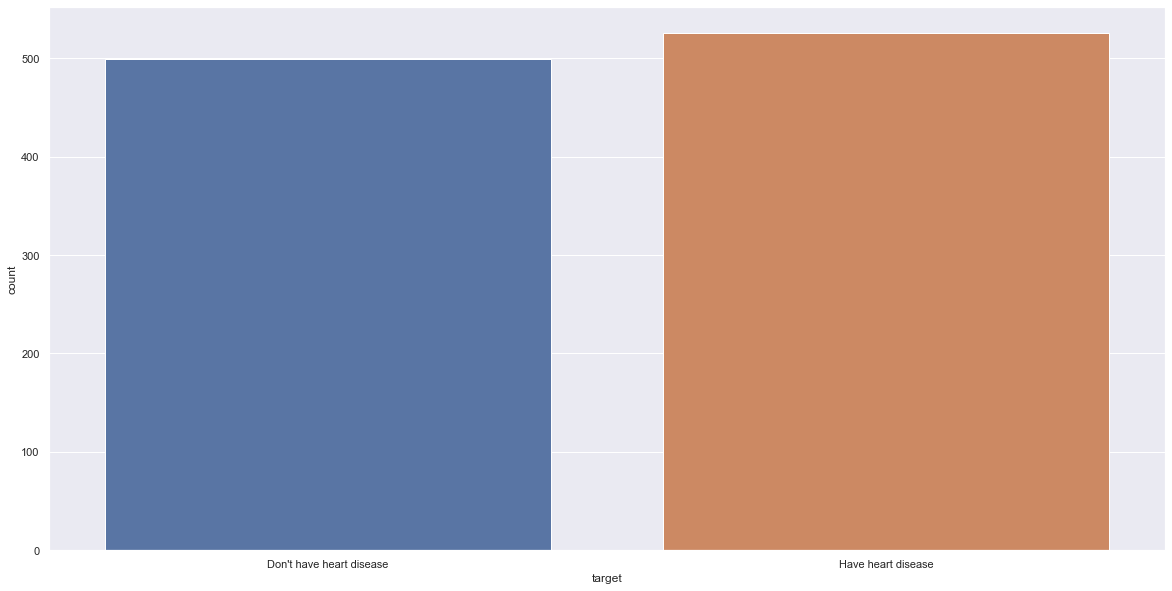

In [17]:
fig = sns.countplot(x='target', data = df)
fig.set_xticklabels(labels=["Don't have heart disease", "Have heart disease"], rotation=0)
sns.set(rc={'figure.figsize':(10,10)})

Observations: The target variable appears well balanced and therefore no need for undersampling or oversampling

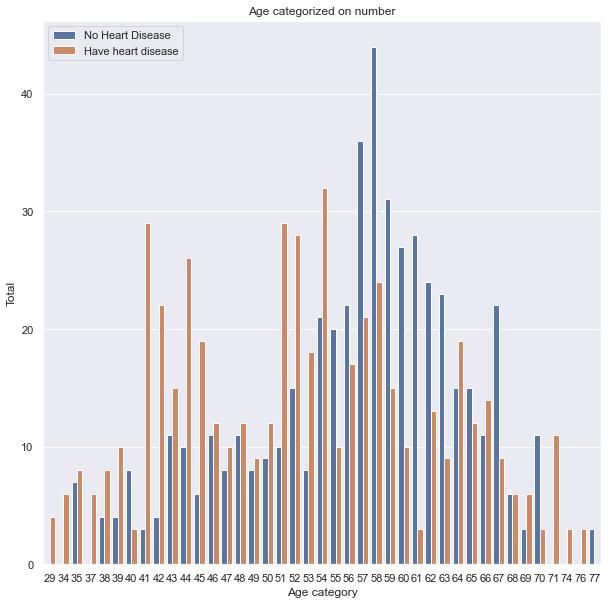

In [59]:
sns.countplot(x='age', hue='target', data = df)
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Age categorized on number')
plt.ylabel('Total')
plt.xlabel('Age category')
plt.legend(['No Heart Disease', 'Have heart disease'], loc ="upper left")
plt.show()

Grouping the age feature into three categories given the labels and utilizing the bins and cut function. This enables a better visual of the age bracket most likey to be prone to heart disease

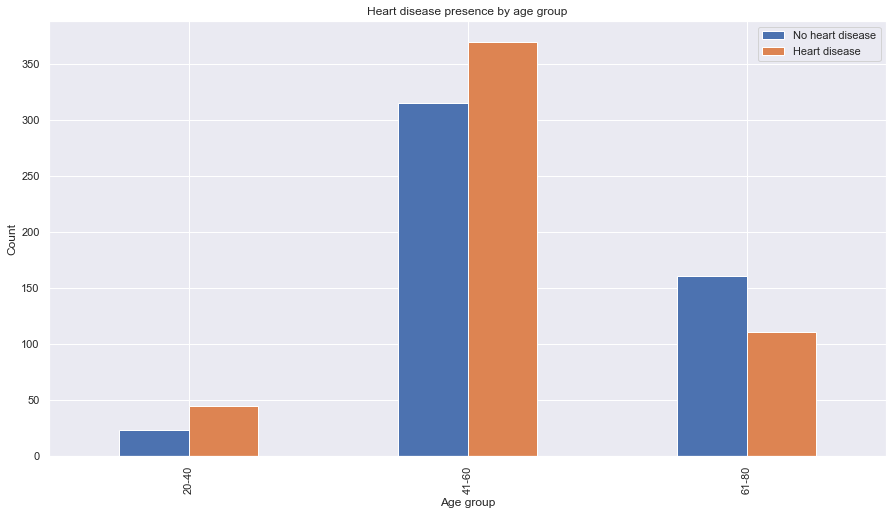

In [16]:
df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 80], labels=['20-40', '41-60', '61-80'])
grouped_data = df.groupby(['age_group', 'target'])['target'].count().unstack()
ax = grouped_data.plot(kind='bar', figsize=(15, 8))
ax.set_title('Heart disease presence by age group')
ax.set_xlabel('Age group')
ax.set_ylabel('Count')
plt.legend(['No heart disease', 'Heart disease'])
plt.show()

Observations: Clearly seen that between ages of 41 - 60 years, are individuals more likely to be diagnosed with heart disease

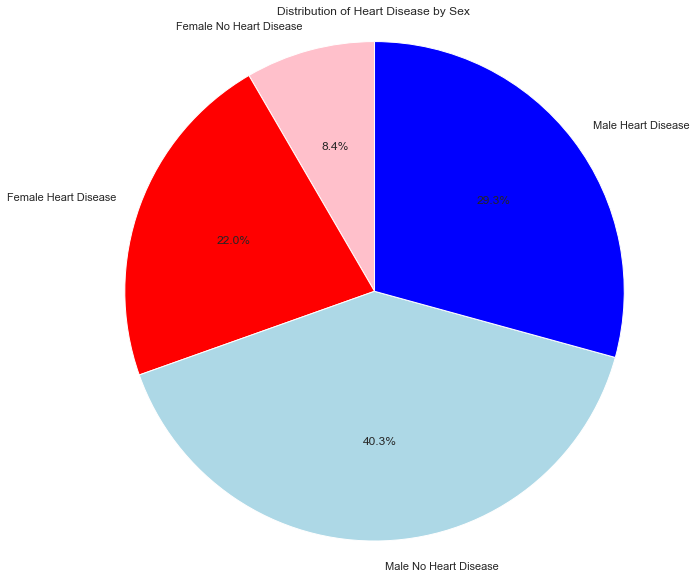

In [18]:
grouped_data = df.groupby(['sex', 'target']).size()
labels = ['Female No Heart Disease', 'Female Heart Disease', 'Male No Heart Disease', 'Male Heart Disease']
sizes = [grouped_data[0,0], grouped_data[0,1], grouped_data[1,0], grouped_data[1,1]]
colors = ['pink', 'red', 'lightblue', 'blue'] 
explode = (0, 0.1, 0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Heart Disease by Sex')
plt.show()

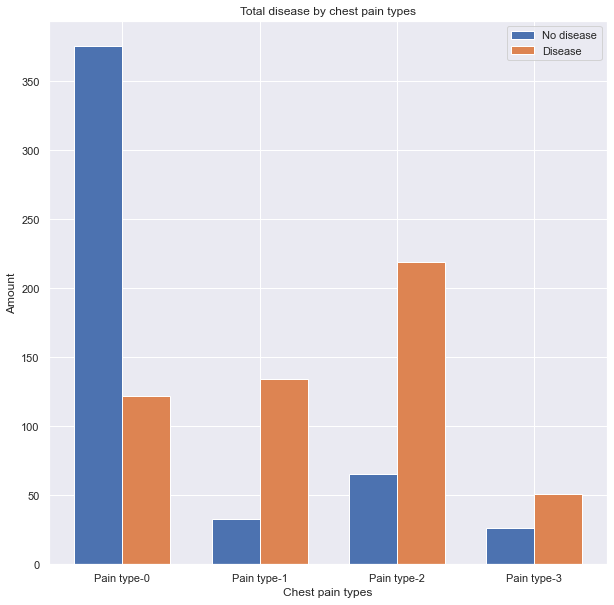

In [19]:
grouping_data = df.groupby(['cp', 'target']).size().reset_index(name='Amount')
pivoting_data = grouping_data.pivot(index='cp', columns='target', values='Amount')
width = 0.35
x_axis_ticks = np.arange(len(pivoting_data.index))
fig, ax= plt.subplots()
bars_1 = ax.bar(x_axis_ticks - width/2, pivoting_data[0], width, label='No disease')
bars_2 = ax.bar(x_axis_ticks + width/2, pivoting_data[1], width, label='Disease')
ax.set_xlabel('Chest pain types')
ax.set_ylabel('Amount')
ax.set_title('Total disease by chest pain types')
ax.set_xticks(x_axis_ticks)
ax.set_xticklabels(labels=['Pain type-0', 'Pain type-1', 'Pain type-2', 'Pain type-3'])
ax.legend()
plt.show()

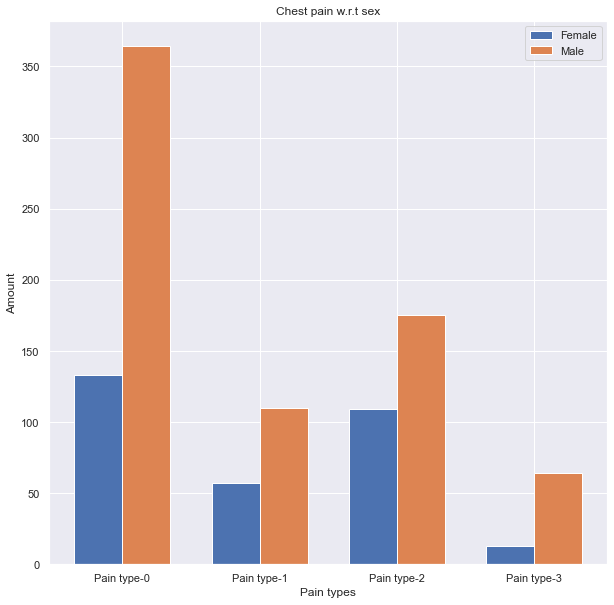

In [20]:
cp_grouping_data = df.groupby(['cp', 'sex']).size().reset_index(name='Amount')
cp_pivoting_data = cp_grouping_data.pivot(index='cp', columns='sex', values='Amount')
width = 0.35
x_cp_axis_ticks = np.arange(len(cp_pivoting_data.index))
fig, ax= plt.subplots()
bars_1 = ax.bar(x_cp_axis_ticks - width/2, cp_pivoting_data[0], width, label='Female')
bars_2 = ax.bar(x_cp_axis_ticks + width/2, cp_pivoting_data[1], width, label='Male')
ax.set_xlabel('Pain types')
ax.set_ylabel('Amount')
ax.set_title('Chest pain w.r.t sex')
ax.set_xticks(x_cp_axis_ticks)
ax.set_xticklabels(labels=['Pain type-0', 'Pain type-1', 'Pain type-2', 'Pain type-3'])
ax.legend()
plt.show()

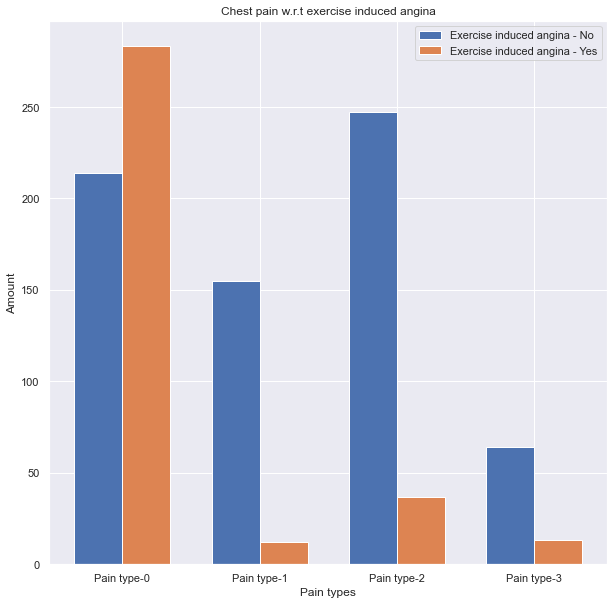

In [21]:
ex_grouping_data = df.groupby(['cp', 'exang']).size().reset_index(name='Amount')
ex_pivoting_data = ex_grouping_data.pivot(index='cp', columns='exang', values='Amount')
width = 0.35
x_ex_axis_ticks = ex_pivoting_data.index
fig, ax= plt.subplots()
bars_1 = ax.bar(x_ex_axis_ticks - width/2, ex_pivoting_data[0], width, label='Exercise induced angina - No')
bars_2 = ax.bar(x_ex_axis_ticks + width/2, ex_pivoting_data[1], width, label='Exercise induced angina - Yes')
ax.set_xlabel('Pain types')
ax.set_ylabel('Amount')
ax.set_title('Chest pain w.r.t exercise induced angina')
ax.set_xticks(x_ex_axis_ticks)
ax.set_xticklabels(labels=['Pain type-0', 'Pain type-1', 'Pain type-2', 'Pain type-3'])
ax.legend()
plt.show()

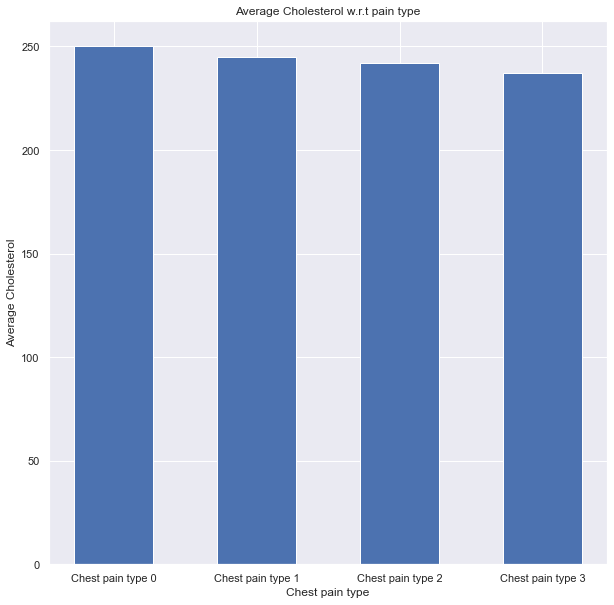

In [22]:
grouping_data = df.groupby('cp')['chol'].mean().reset_index(name='mean_chol')
width = 0.55
x_axis_ticks = np.arange(len(grouping_data.index))
fig, ax= plt.subplots()
bars_1 = ax.bar(x_axis_ticks, grouping_data['mean_chol'], width)
ax.set_xlabel('Chest pain type')
ax.set_ylabel('Average Cholesterol')
ax.set_title('Average Cholesterol w.r.t pain type')
ax.set_xticks(x_axis_ticks)
ax.set_xticklabels(labels=['Chest pain type 0', 'Chest pain type 1', 'Chest pain type 2', 'Chest pain type 3'])
plt.show()

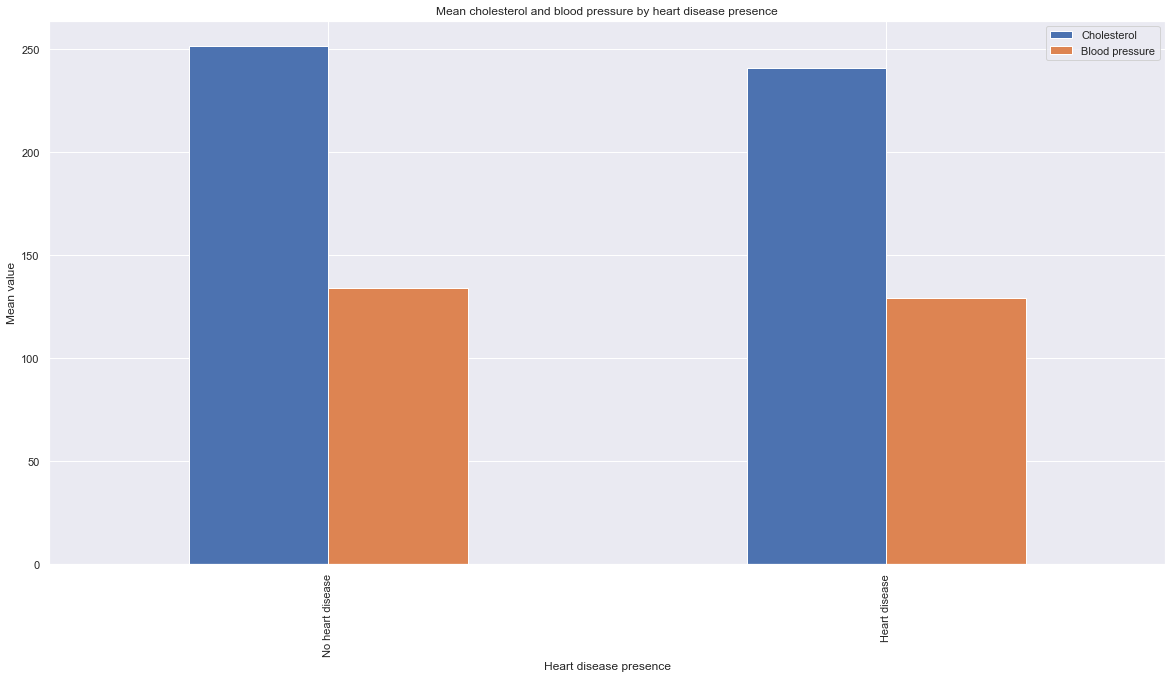

In [23]:
grouped_data = df.groupby('target')[['chol', 'trestbps']].mean()
ax = grouped_data.plot(kind = 'bar', figsize= (20,10))
ax.set_title('Mean cholesterol and blood pressure by heart disease presence')
ax.set_xlabel('Heart disease presence')
ax.set_xticklabels(labels=['No heart disease', 'Heart disease'])
ax.set_ylabel('Mean value')
plt.legend(['Cholesterol', 'Blood pressure'])
plt.show()

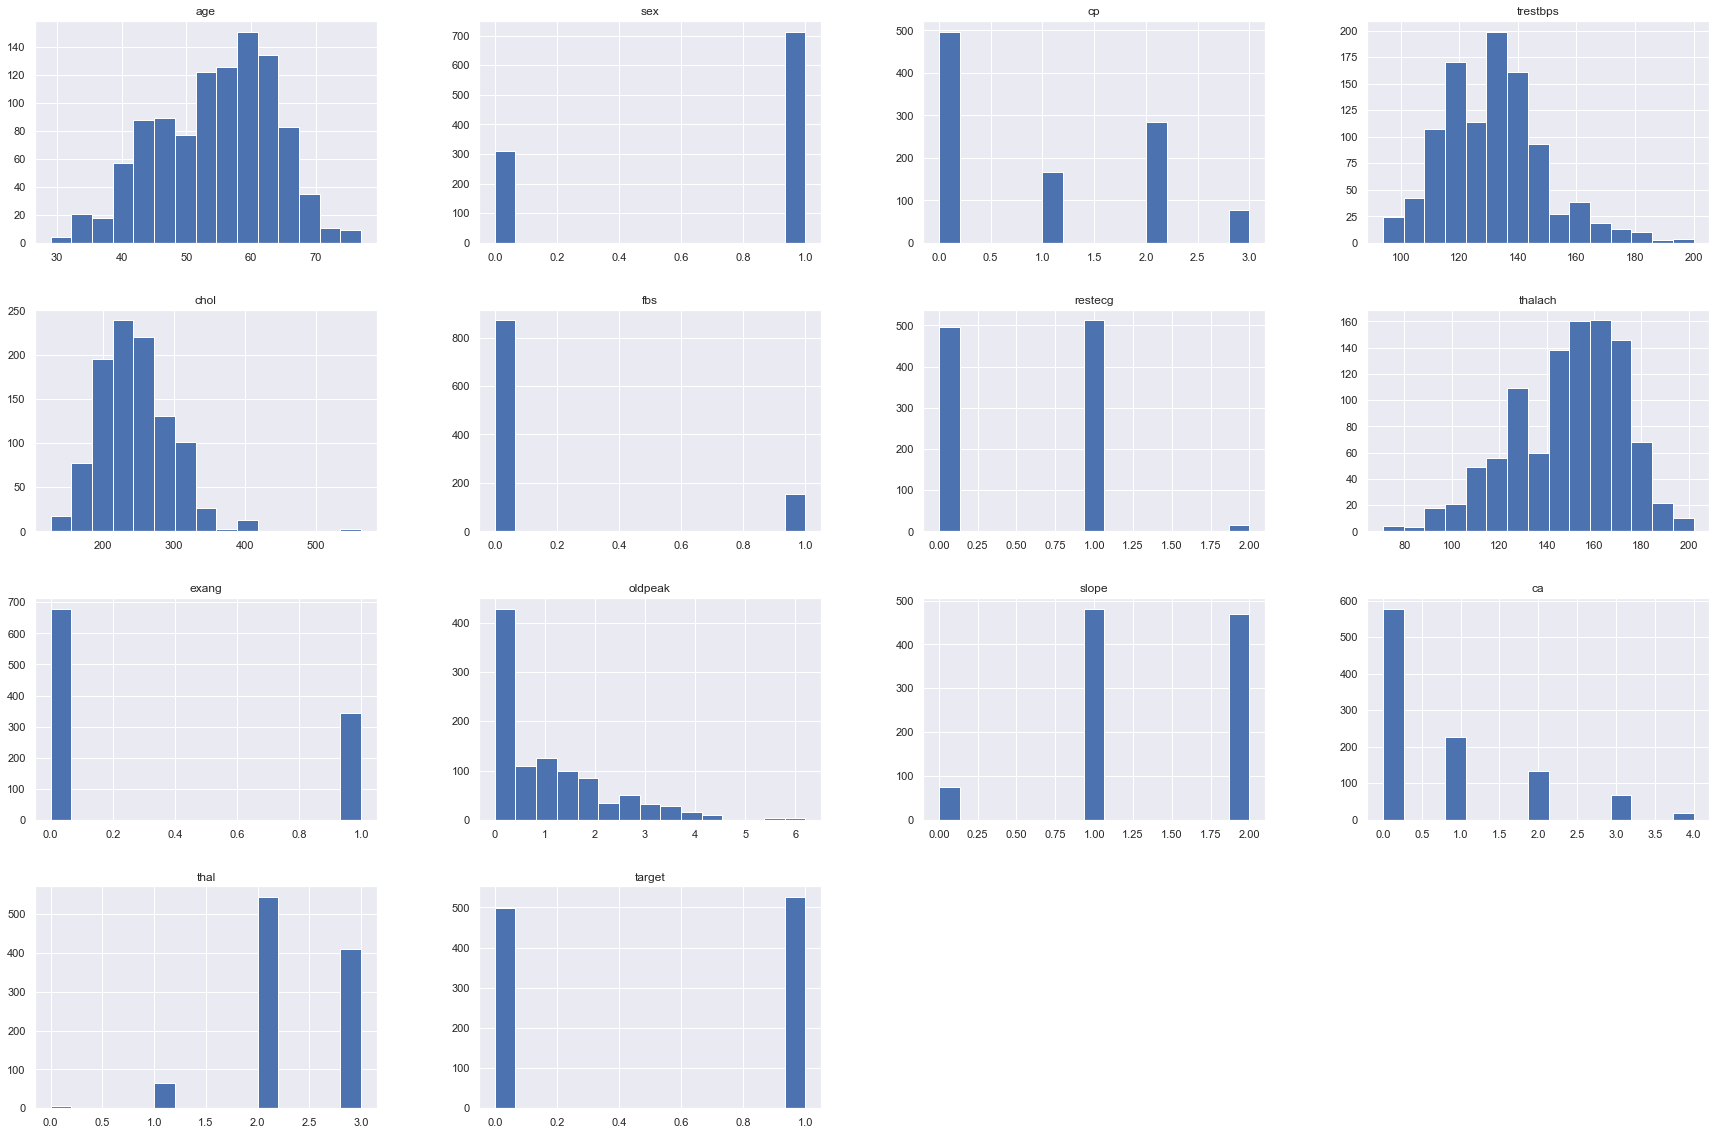

In [24]:
df.hist(bins=15, figsize=(30,20))
plt.show()

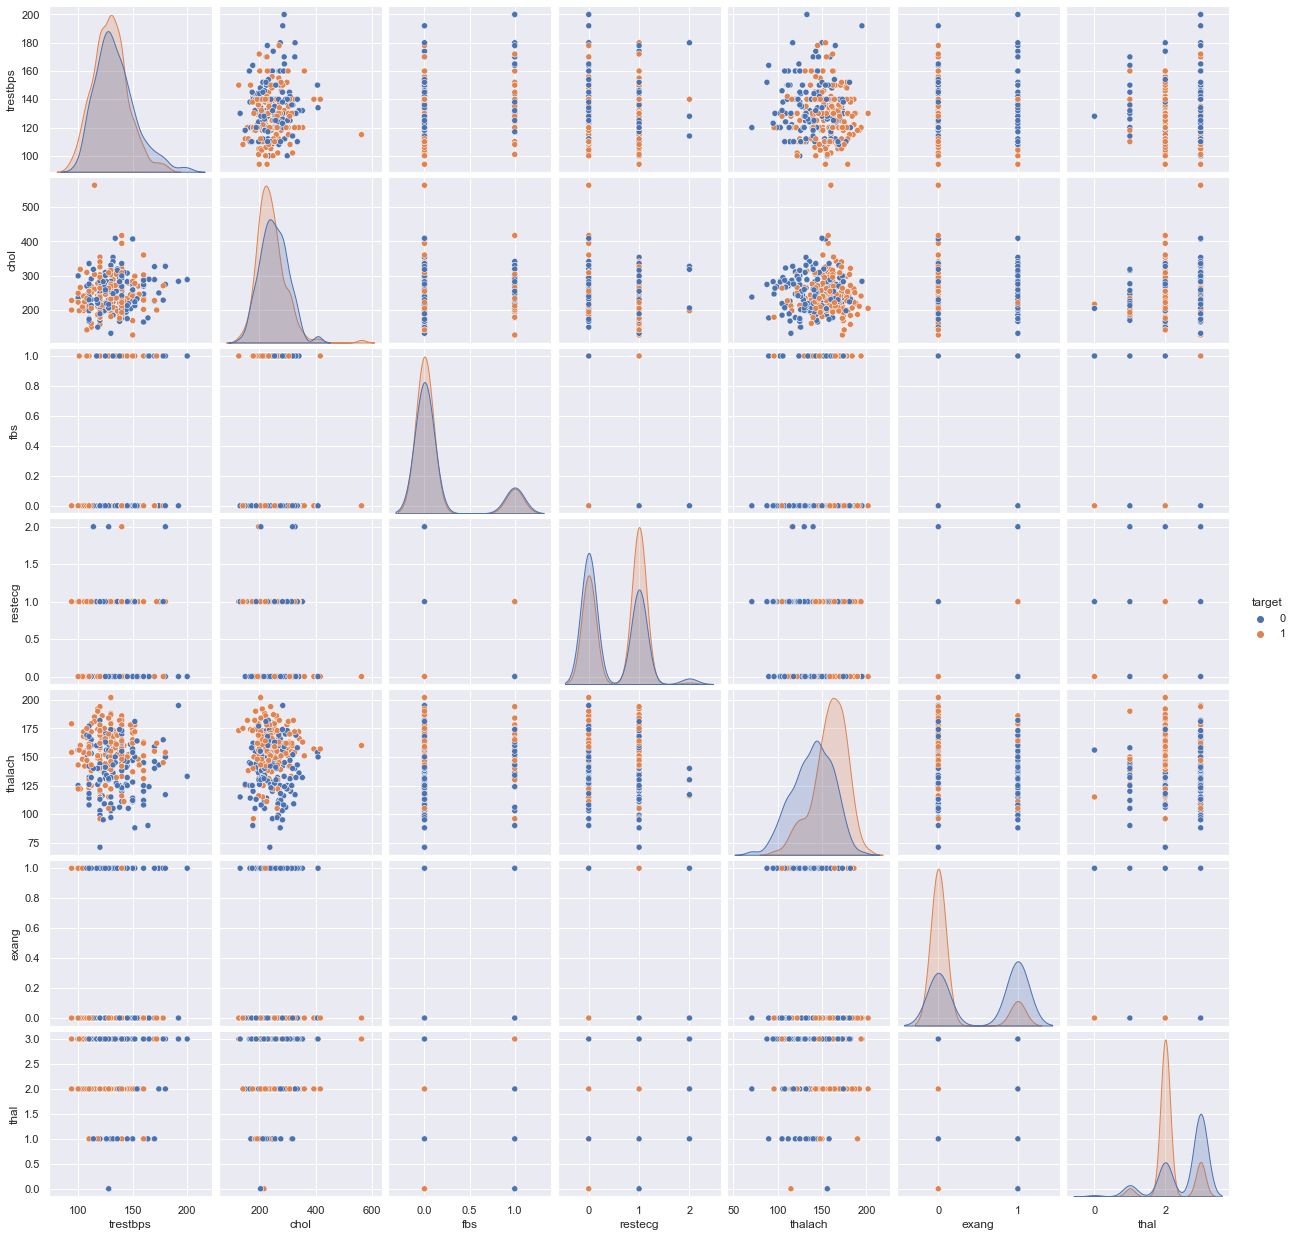

In [25]:
sns.pairplot(df[['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'thal', 'target']], hue='target')
plt.show()

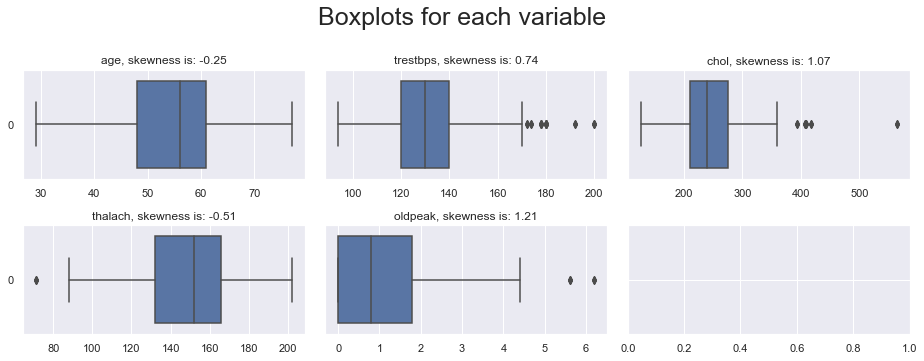

In [26]:
# checking boxplots
def boxplots_df(df, columns_list, rows, cols, suptitle):
    fig, ax = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    ax = ax.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=df[data], orient='h', ax=ax[i])
        ax[i].set_title(data + ', skewness is: '+str(round(df[data].skew(axis = 0, skipna = True),2)))
        
boxplots_df(df=df, columns_list=df[numerical], rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

# MODEL EVALUATION

SCALING DATA USING STANDARD SCALER

In [27]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)
print(scaled_x)

[[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]


SPLITTING TO TEST AND TRAIN SET 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 0)
len(x_train), len(x_test), len(y_train), len(y_test)

(820, 205, 820, 205)

MODELS FOR EVALUATION

1. Logistic Regression
2. Naive Bayes
3. K-Nearest Neighbour
4. Random Forest Classifier
5. Decision Tree Classifier

1. LOGISTIC REGRESSION

In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_test_predict_log = model.predict(x_test)
y_train_predict_log = model.predict(x_train)
log_test_accuracy = accuracy_score(y_test, y_test_predict_log)
log_train_accuracy = accuracy_score(y_train, y_train_predict_log)
print("Accuracy of train Logistic Regression:",log_train_accuracy*100,'\n')
print("Accuracy of test Logistic Regression:",log_test_accuracy*100,'\n')
print(classification_report(y_test,y_test_predict_log))

Accuracy of train Logistic Regression: 85.85365853658537 

Accuracy of test Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



Observations: The precision of the logistic regression model with regard to training and testing data is indicated in the 1st 2 lines. The model has an accuracy of 85.85% when training data are used, and 86.34% with the test data. 
An overview of the model's performance on testing data is provided in the classification report. It shows the precision, recall, and f1-score for each class (0 and 1), as well as the support (number of samples) for each class.
The precision is 0.92 for class 0 those who have no heart disease, which means that 92% of the samples predicted as classes 0 are in fact Class 0. The recall is 0.79, which means that 79% were correctly predicted as class 0 out of all the actual class 0 samples. The f1-score is 0.85, which is the harmonic mean of precision and recall. Overall, the model is able to correctly predict class 0 samples with a weighted average f1 score of 0.87.
For class 1 (those who had a heart disease), the precision is 0.83, which means that out of all the samples predicted as class 1, 83% were actually class 1. The recall is 0.93, meaning that 93% were correct in predicting class 1 out of all the samples taken. The f1 score is 0.88, which is the harmonic mean of accuracy and recall. Overall, with a weighted average f1 Score of 0.87 the model is well placed to correctly predict class 1 samples.


Feature Importance

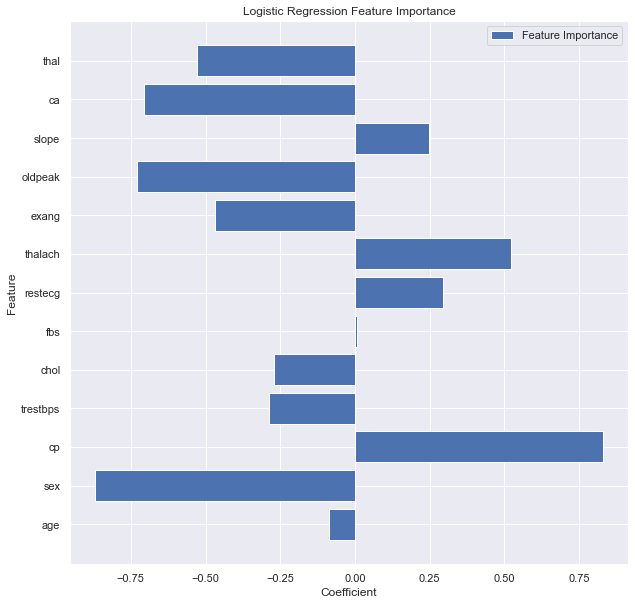

In [30]:
# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create a bar chart
plt.barh(feature_names, coefficients)

# Add labels and title
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Logistic Regression Feature Importance")

# Add legend
plt.legend(["Feature Importance"])

# Show the plot
plt.show()

Observation: From the feature importance chart, it can be seen that sex and chest pain had the most impact on the target negatively and positively respectively. While fasting blood sugar had very little impact on the target

ROC CURVE - LOGISTIC REGRESSION

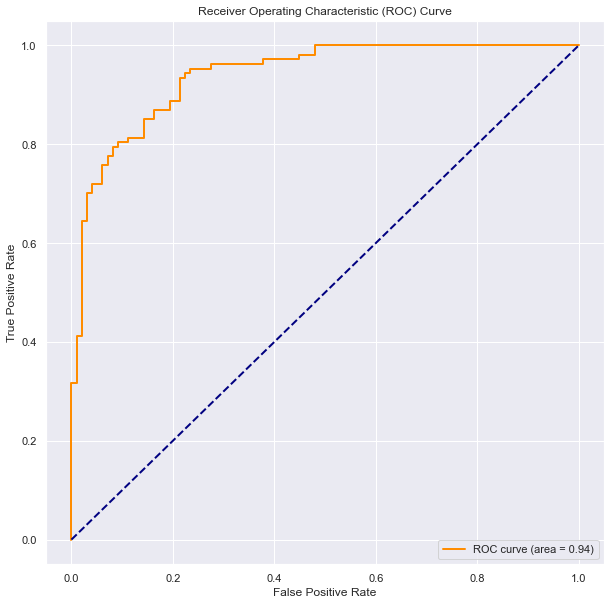

In [31]:
# Predict probabilities for the testing set
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Observation: An AUC of 0.94 suggests that the classifier has a high ability to distinguish between positive and negative classes, with only a small number of misclassifications.

2. NAIVE BAYES

In [32]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_test_predict_gnb = gnb.predict(x_test)
y_train_pred_gnb = gnb.predict(x_train)
gnb_test_accuracy = accuracy_score(y_test, y_test_predict_gnb)
gnb_train_accuracy = accuracy_score(y_train, y_train_pred_gnb)
print("Accuracy of train Naive Bayes:",gnb_train_accuracy*100,'\n')
print("Accuracy of test Naive Bayes:",gnb_test_accuracy*100,'\n')
print(classification_report(y_test,y_test_predict_gnb))

Accuracy of train Naive Bayes: 82.07317073170731 

Accuracy of test Naive Bayes: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



Feature Importance

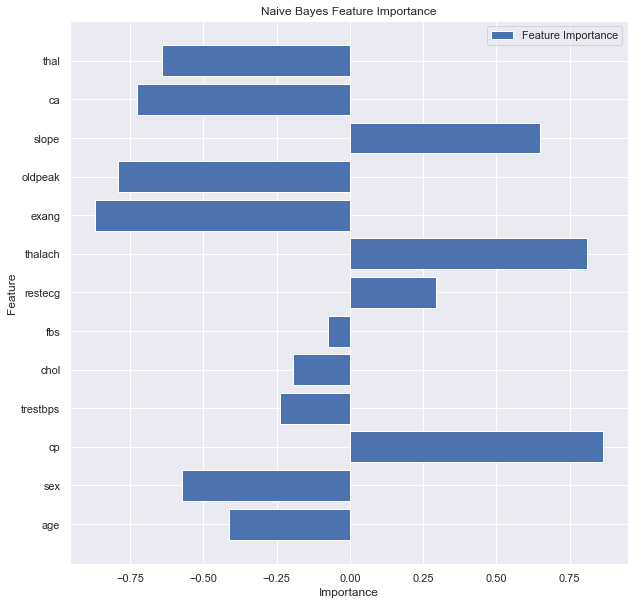

In [33]:
feature_names = X.columns
importances = gnb.theta_[1] - gnb.theta_[0]

# Create a bar chart
plt.barh(feature_names, importances)

# Add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Naive Bayes Feature Importance")

# Add legend
plt.legend(["Feature Importance"])

# Show the plot
plt.show()

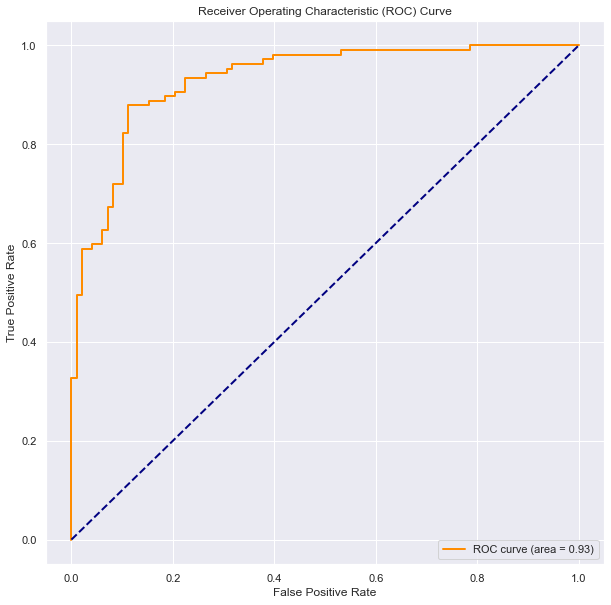

In [34]:
y_pred_proba = gnb.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Observation: An AUC of 0.94 suggests that the classifier has a high ability to distinguish between positive and negative classes, with only a small number of misclassifications.

3. K-NEAREST NEIGHBOUR

In [35]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predict_knn = knn.predict(x_test)
y_train_pred_knn = knn.predict(x_train)
knn_test_accuracy = accuracy_score(y_test, y_predict_knn)
knn_train_accuracy = accuracy_score(y_train, y_train_pred_knn)
print("Accuracy of train KNN:",knn_train_accuracy*100,'%','\n')
print("Accuracy of test KNN:",knn_test_accuracy*100,'%','\n')
print(classification_report(y_test,y_predict_knn))

Accuracy of train KNN: 95.60975609756098 % 

Accuracy of test KNN: 87.8048780487805 % 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



Observation: The output is showing the accuracy of the KNN model on both the training and test sets. The training accuracy is 95.61%, which means that the model predicted the outcomes of the training data correctly for 95.61% of the cases. The test accuracy is 87.80%, which means that the model predicted the outcomes of the test data correctly for 87.80% of the cases.
The classification report will show the accuracy, recall and F1 rating for each of the two classes 0 and 1 in the test set. The precision is the percentage of real positive events in a predicted positive event, recall is the percent of actual positive events and F1 score is an arithmetic mean for accuracy and recall. For class 0, the weighted average of F1 scores is 0.87; for class 1, it's 0.88, which would be a fair score.
In summary, the KNN model has a good accuracy on both the training and test sets, and it has reasonably good precision, recall, and F1-score for both classes.

Feature Importance

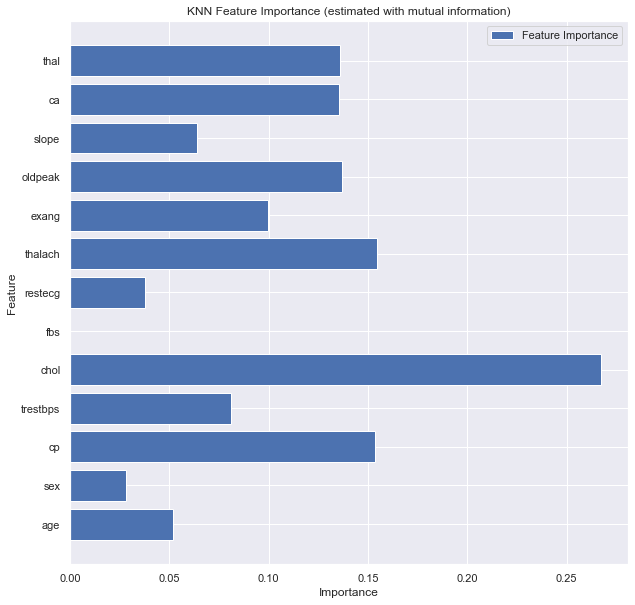

In [36]:
# Get feature importances using mutual information
importances = mutual_info_classif(X, y)

# Get feature names
feature_names = X.columns

# Create a bar chart
plt.barh(feature_names, importances)

# Add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("KNN Feature Importance (estimated with mutual information)")

# Add legend
plt.legend(["Feature Importance"])

# Show the plot
plt.show()

Observation: cholesterol has the highest impact on the target. While fbs has no impact on the target.

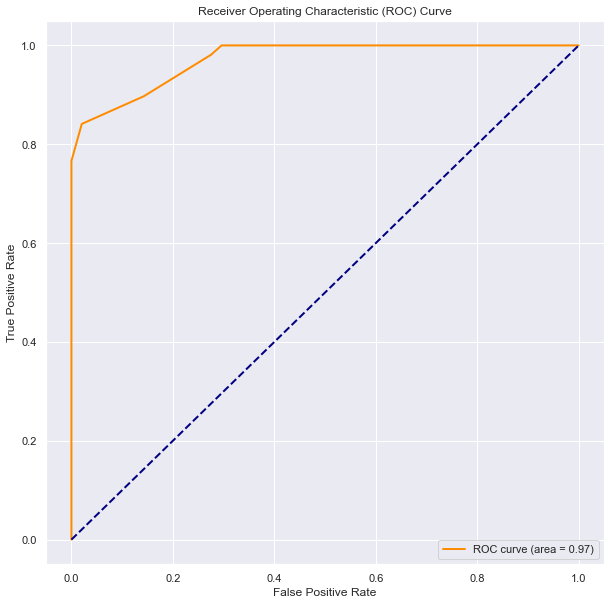

In [37]:
y_pred_proba = knn.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Observation: An AUC of 0.97 indicates that the classifier has a very high ability to correctly classify positive and negative instances. It suggests that the classifier is doing a good job in distinguishing between the two classes.

4. RANDOM FOREST CLASSIFIER

In [38]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 5)
rfc.fit(x_train, y_train)
y_predict_rfc = rfc.predict(x_test)
y_train_pred_rfc = rfc.predict(x_train)
rfc_test_accuracy = accuracy_score(y_test, y_predict_rfc)
rfc_train_accuracy = accuracy_score(y_train, y_train_pred_rfc)
print("Accuracy of train Random Forest Classifier:",rfc_train_accuracy*100,'%','\n')
print("Accuracy of test Random Forest Classifier:",rfc_test_accuracy*100,'%','\n')
print(classification_report(y_test,y_predict_rfc))

Accuracy of train Random Forest Classifier: 94.39024390243902 % 

Accuracy of test Random Forest Classifier: 95.1219512195122 % 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        98
           1       0.93      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



Observations: The model has an overall accuracy of 0.95, indicating that it correctly classified 95% of the samples. The precision for class 0 (no heart disease) is 0.98, meaning that when the model predicted a sample to be in class 0, it was correct 98% of the time. The recall for class 0 is 0.92, meaning that the model correctly identified 92% of the actual class 0 samples. 
For class 1 (presence of heart disease), the precision is 0.93, indicating that when the model predicted a sample to be in class 1, it was correct 93% of the time. The recall for class 1 is 0.98, indicating that the model correctly identified 98% of the actual class 1 samples. 
The macro average f1-score for both classes is 0.95, while the weighted average f1-score is also 0.95. This indicates that the model has good performance in both classes and that the precision and recall values are well balanced. Overall, this suggests that the random forest model is a good fit for this classification task.


Feature Importance

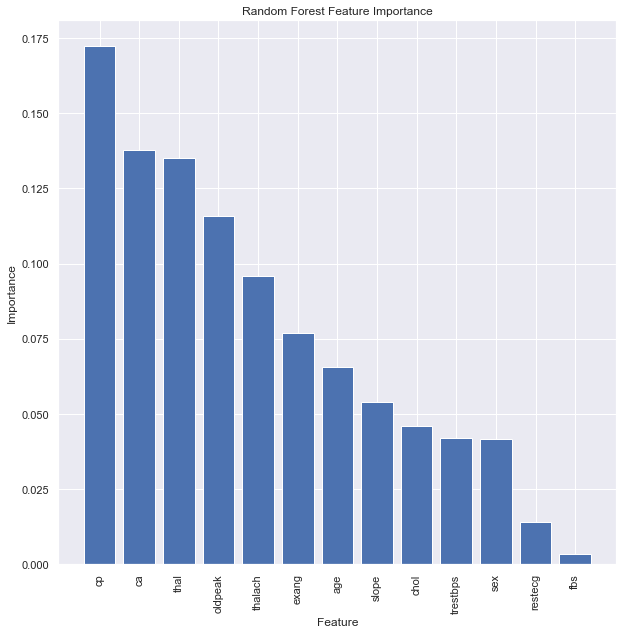

In [39]:
importances = rfc.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Create a bar chart
plt.bar(sorted_feature_names, importances[indices])

# Add labels and title
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Observation: from the feature importance, chest pain has the most impact to the target when using a random forest classification model. While fbs had the least impact to the target.

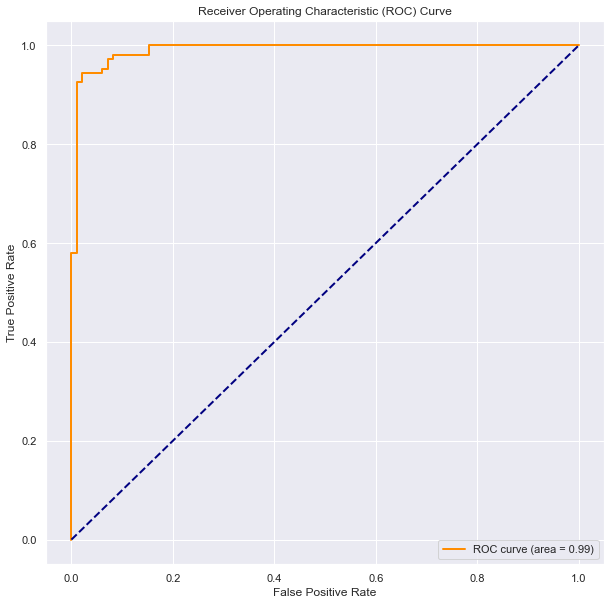

In [40]:
y_pred_proba = rfc.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Observation: An AUC of 0.99 is a very high value, which indicates that the model has a very good ability to distinguish between positive and negative samples.

5. DECISION TREE CLASSIFIER

In [60]:
dtc = DecisionTreeClassifier(random_state = 0, max_depth=6)
dtc.fit(x_train, y_train)
dtc_test_pred = dtc.predict(x_test)
dtc_train_pred = dtc.predict(x_train)
dtc_test_accuracy = accuracy_score(y_test, dtc_test_pred)
dtc_train_accuracy = accuracy_score(y_train, dtc_train_pred)
print("Accuracy of train Decision Tree Classifier:",dtc_train_accuracy*100,'%','\n')
print("Accuracy of test Decision Tree Classifier:",dtc_test_accuracy*100,'%','\n')
print(classification_report(y_test,dtc_test_pred))

Accuracy of train Decision Tree Classifier: 96.46341463414633 % 

Accuracy of test Decision Tree Classifier: 94.14634146341463 % 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        98
           1       0.93      0.96      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



Observation: The model of the Decision Tree Classifier was able to reach an accuracy of 96.46% for training and 94,15% for testing. This means that the model has been slightly overfitting on the training set but still does very well when tested. We can see that, when we look at the accuracy, recall and F1 Score metrics, our model does very well in both classes with precision of 0.96 for Class 1 and 0.93 for Class 0; respectively, recalls of 0.92 and 0.96, and F1 Scores of 0.94 for each class.

Feature Importance

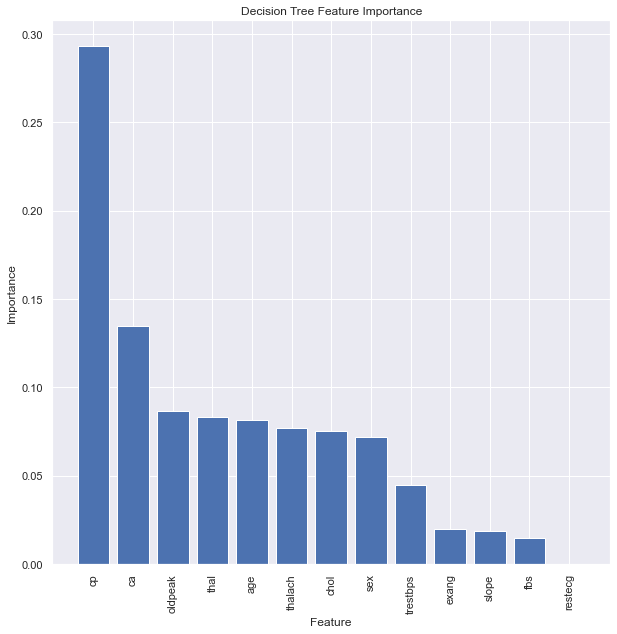

In [42]:
importances = dtc.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Create a bar chart
plt.bar(sorted_feature_names, importances[indices])

# Add labels and title
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importance")

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Observation: chest pain has the highest impact on the target while resting ecg has no impact on the target while using decision tree cassification model

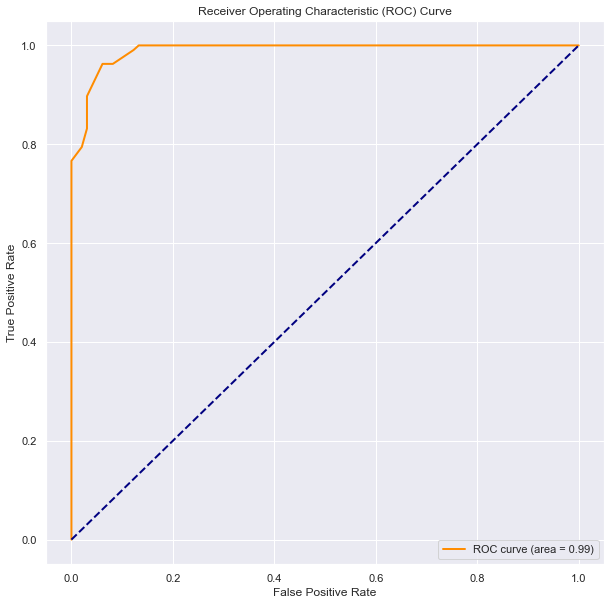

In [43]:
y_pred_proba = dtc.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Observation: An AUC of 0.99 is a very high value, which indicates that the model has a very good ability to distinguish between positive and negative samples.

MODEL COMPARISONS

In [44]:
tabled_accuracies = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'K-Nearest Nieghbor', 'Random Forest', 'Decision Tree'],
                                 'Test Accuracy':[round(log_test_accuracy*100, 2),round(gnb_test_accuracy*100, 2),
                                                 round(knn_test_accuracy*100, 2),round(rfc_test_accuracy*100, 2),
                                                 round(dtc_test_accuracy*100, 2)],
                                 'Train Accuracy':[format(log_train_accuracy*100,".2f"),format(gnb_train_accuracy*100,".2f"),
                                                 format(knn_train_accuracy*100,".2f"),format(rfc_train_accuracy*100,".2f"),
                                                 format(dtc_train_accuracy*100,".2f")]})
tabled_accuracies

,Model,Test Accuracy,Train Accuracy
0,Logistic Regression,86.34,85.85
1,Naive Bayes,85.37,82.07
2,K-Nearest Nieghbor,87.80,95.61
3,Random Forest,95.12,94.39
4,Decision Tree,94.15,96.46


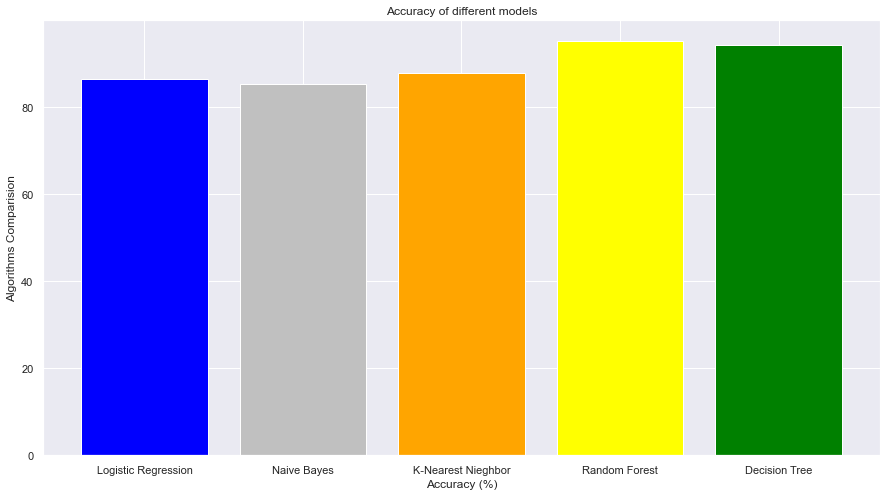

In [45]:
colorscale = ['blue','silver','orange','yellow','green']
plt.figure(figsize=(15,8))
plt.title("Accuracy of different models")
plt.xlabel("Accuracy (%)")
plt.ylabel("Algorithms Comparision")
plt.bar(tabled_accuracies['Model'],tabled_accuracies['Test Accuracy'],color = colorscale)
plt.show()

SHAP for chosen algorithm

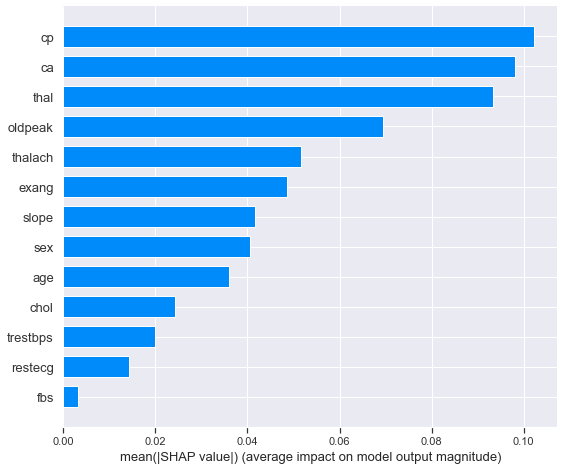

In [46]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

# Create SHAP explainer object
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for all test data
shap_values = explainer.shap_values(x_test)

# Plot feature importance using SHAP summary plot
shap.summary_plot(shap_values[1], x_test, plot_type="bar", feature_names=X.columns)

# HYPERPARAMETER TUNING

Logistic Regression tuning

In [47]:
# Parameters for logistic regression
lr_space = dict()
lr_space['C'] = [0.001, 0.01, 1, 10]
lr_space['solver'] = ['lbfgs', 'linear']
lr_space['max_iter'] = [1000]

# Model: Logistic regression
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
lr_cv = GridSearchCV(LogisticRegression(), lr_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(lr_cv, scaled_x, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.2f (%.3f)' % (mean(scores)*100, std(scores)))

Accuracy: 84.19 (0.030)


Naive Bayes Tuning

In [48]:
nb_space = {'var_smoothing': np.logspace(-10,0,100)}
X = scaled_x

# assigning cross-validation
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

nb_model = GaussianNB()
nb_cv = GridSearchCV(estimator=nb_model, param_grid=nb_space, scoring='accuracy', cv=cv_inner, n_jobs=-1, refit=True)
scores = cross_val_score(estimator=nb_cv, X=X, y=y, scoring='accuracy', cv=cv_outer, n_jobs=-1)

print('Accuracy: %.2f (%.3f)' % (np.mean(scores)*100, np.std(scores)))
#print('Best hyperparameters:', nb_cv.best_params_)

Accuracy: 82.74 (0.033)


K-Nearest Neighbour tuning

In [49]:
# Define the hyperparameter space
knn_space = dict()
knn_space['n_neighbors'] = range(1, 21)
knn_space['weights'] = ['uniform', 'distance']
knn_space['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Model: K-Nearest Neighbors
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
knn_cv = GridSearchCV(KNeighborsClassifier(), knn_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(knn_cv, scaled_x, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('K-Nearest Neighbor Tuned Accuracy: %.2f (%.3f)' % (mean(scores)*100, std(scores)))

K-Nearest Neighbor Tuned Accuracy: 100.00 (0.000)


Random Forest Classifier tuning

In [50]:
# Define the hyperparameter space
rf_space = dict()
rf_space['n_estimators'] = [100, 300, 500]
rf_space['max_depth'] = [10, 30, 50, None]
rf_space['min_samples_split'] = [2, 5, 10]
rf_space['min_samples_leaf'] = [1, 2, 4]
rf_space['max_features'] = ['sqrt', 'log2', None]

# Model: Random Forest
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
rf_cv = GridSearchCV(RandomForestClassifier(), rf_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(rf_cv, scaled_x, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Random Forest Classifier Tuned Accuracy: %.2f (%.3f)' % (mean(scores)*100, std(scores)))

Random Forest Classifier Tuned Accuracy: 100.00 (0.000)


Decision Tree

In [51]:
# create a dictionary of hyperparameters and their values to tune
dt_space = {'max_depth': [2, 4, 6, 8, 10],
            'min_samples_split': [2, 4, 6, 8, 10],
            'criterion': ['gini', 'entropy']}

# define the model
dt = DecisionTreeClassifier()

# define the search
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
dt_cv = GridSearchCV(dt, dt_space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# define the outer cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# execute the nested cross-validation
scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)

# report the performance
print('Deicision Tree Classifier Tuned Accuracy: %.2f (%.3f)' % (mean(scores)*100, std(scores)))

Deicision Tree Classifier Tuned Accuracy: 99.80 (0.006)


# Summary of tuned results

Findings: According to the hyperparameter test results, it appears that Random Forest models and KNN have been best at achieving 100 % accuracy. A model of a decision tree has also shown good results, with an accuracy of 99.8%. However, logistic regressions and Naive Bayes models did not reach the same accuracy rate of 84.19% and 82.74% in both cases. It is important to note that hyperparameter tuning can have a significant effect on model performance, which should be explored in various combinations when selecting the best combination for any given problem.